In [1]:
import librosa
import numpy as np

In [2]:
def zero_padded_data_nparray(audios_path, duration_secs=4, target_sample_rate=44100, verbose=False):
    files = librosa.util.find_files(audios_path)
    data_array = np.zeros(shape=(len(files,), duration_secs*target_sample_rate))
    for index, file in enumerate(files):
        if verbose:
            print(f"At audio {index+1}/{len(files)}")
        signal, sample_rate = librosa.load(file, sr=None)
        # resample the sample rate to the target value of SR
        signal = librosa.resample(signal, orig_sr=sample_rate, target_sr=target_sample_rate)
        # zero padding
        if len(signal) < duration_secs*target_sample_rate:
            signal = np.concatenate([
                signal,
                np.zeros(shape=(duration_secs*target_sample_rate-len(signal), ))
            ])
        data_array[index] = signal
    return data_array

In [4]:
import matplotlib.pyplot as plt
data = zero_padded_data_nparray("../UrbanSound8K/audio/fold1/", verbose=True)

At audio 1/873
At audio 2/873
At audio 3/873
At audio 4/873
At audio 5/873
At audio 6/873
At audio 7/873
At audio 8/873
At audio 9/873
At audio 10/873
At audio 11/873
At audio 12/873
At audio 13/873
At audio 14/873
At audio 15/873
At audio 16/873
At audio 17/873
At audio 18/873
At audio 19/873
At audio 20/873
At audio 21/873
At audio 22/873
At audio 23/873
At audio 24/873
At audio 25/873
At audio 26/873
At audio 27/873
At audio 28/873
At audio 29/873
At audio 30/873
At audio 31/873
At audio 32/873
At audio 33/873
At audio 34/873
At audio 35/873
At audio 36/873
At audio 37/873
At audio 38/873
At audio 39/873
At audio 40/873
At audio 41/873
At audio 42/873
At audio 43/873
At audio 44/873
At audio 45/873
At audio 46/873
At audio 47/873
At audio 48/873
At audio 49/873
At audio 50/873
At audio 51/873
At audio 52/873
At audio 53/873
At audio 54/873
At audio 55/873
At audio 56/873
At audio 57/873
At audio 58/873
At audio 59/873
At audio 60/873
At audio 61/873
At audio 62/873
At audio 63/873
A

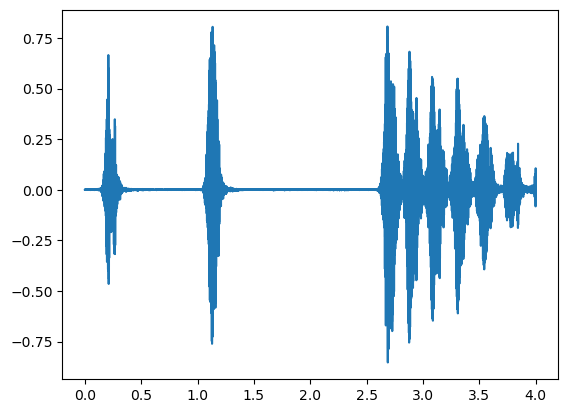

In [5]:
i = 0
plt.figure()
plt.plot(np.asfarray(list(range(4*44100)))/44100, data[0])
plt.show()

In [9]:
def mfcc_data_nparray(audios_data, n_mfcc=20, target_sample_rate=44100, verbose=False):
    # MFCC parameters
    hop_length=round(target_sample_rate*0.0125)
    win_length=round(target_sample_rate*0.023)
    n_fft=2**14
    time_size = 4*target_sample_rate//hop_length+1
    # compute the MFCCs
    data_mfcc = np.zeros(shape=(len(audios_data), n_mfcc, time_size))
    for index, audio_data in enumerate(audios_data):
        if verbose:
            print(f"At audio {index+1}/{len(audios_data)}")
        signal_mfcc = librosa.feature.mfcc(y=audio_data, sr=target_sample_rate, n_fft=n_fft, hop_length=hop_length, win_length=win_length, n_mfcc=n_mfcc)
        data_mfcc[index] = signal_mfcc
    return data_mfcc


In [10]:
data_mfcc = mfcc_data_nparray(data, n_mfcc=40, verbose=True)

At audio 1/873
At audio 2/873
At audio 3/873
At audio 4/873
At audio 5/873
At audio 6/873
At audio 7/873
At audio 8/873
At audio 9/873
At audio 10/873
At audio 11/873
At audio 12/873
At audio 13/873
At audio 14/873
At audio 15/873
At audio 16/873
At audio 17/873
At audio 18/873
At audio 19/873
At audio 20/873
At audio 21/873
At audio 22/873
At audio 23/873
At audio 24/873
At audio 25/873
At audio 26/873
At audio 27/873
At audio 28/873
At audio 29/873
At audio 30/873
At audio 31/873
At audio 32/873
At audio 33/873
At audio 34/873
At audio 35/873
At audio 36/873
At audio 37/873
At audio 38/873
At audio 39/873
At audio 40/873
At audio 41/873
At audio 42/873
At audio 43/873
At audio 44/873
At audio 45/873
At audio 46/873
At audio 47/873
At audio 48/873
At audio 49/873
At audio 50/873
At audio 51/873
At audio 52/873
At audio 53/873
At audio 54/873
At audio 55/873
At audio 56/873
At audio 57/873
At audio 58/873
At audio 59/873
At audio 60/873
At audio 61/873
At audio 62/873
At audio 63/873
A

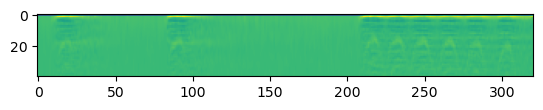

In [11]:
i = 0
plt.figure()
plt.imshow(data_mfcc[i])
plt.show()

In [12]:
def chromo_data_nparray(audios_data, n_chroma=12, target_sample_rate=44100, verbose=False):
    # Chromo parameters
    hop_length=round(target_sample_rate*0.0125)
    win_length=round(target_sample_rate*0.023)
    n_fft=2**14
    time_size = 4*target_sample_rate//hop_length+1
    # compute the chromograms
    data_chromo = np.zeros(shape=(len(audios_data), n_chroma, time_size))
    for index, audio_data in enumerate(audios_data):
        if verbose:
            print(f"At audio {index+1}/{len(audios_data)}")
        signal_mfcc = librosa.feature.chroma_stft(y=audio_data, sr=target_sample_rate, n_fft=n_fft, hop_length=hop_length, win_length=win_length, n_chroma=n_chroma)
        data_chromo[index] = signal_mfcc
    return data_chromo


In [15]:
data_chromo = chromo_data_nparray(data, n_chroma=40, verbose=True)

At audio 1/873
At audio 2/873
At audio 3/873
At audio 4/873
At audio 5/873
At audio 6/873
At audio 7/873
At audio 8/873
At audio 9/873
At audio 10/873
At audio 11/873
At audio 12/873
At audio 13/873
At audio 14/873
At audio 15/873
At audio 16/873
At audio 17/873
At audio 18/873
At audio 19/873
At audio 20/873
At audio 21/873
At audio 22/873
At audio 23/873
At audio 24/873
At audio 25/873
At audio 26/873
At audio 27/873
At audio 28/873
At audio 29/873
At audio 30/873
At audio 31/873
At audio 32/873
At audio 33/873
At audio 34/873
At audio 35/873
At audio 36/873
At audio 37/873
At audio 38/873
At audio 39/873
At audio 40/873
At audio 41/873
At audio 42/873
At audio 43/873
At audio 44/873
At audio 45/873
At audio 46/873
At audio 47/873
At audio 48/873
At audio 49/873
At audio 50/873
At audio 51/873
At audio 52/873
At audio 53/873
At audio 54/873
At audio 55/873
At audio 56/873
At audio 57/873
At audio 58/873
At audio 59/873
At audio 60/873
At audio 61/873
At audio 62/873
At audio 63/873
A

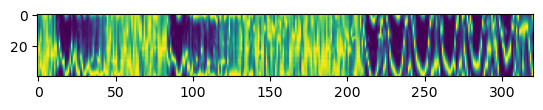

In [16]:
i = 0
plt.figure()
plt.imshow(data_chromo[i])
plt.show()

In [21]:
from librosa.feature.spectral import spectral_centroid, spectral_bandwidth, spectral_contrast, spectral_flatness, spectral_rolloff

def spectral_data_df(audios_data, target_sample_rate=44100, verbose=False):
    # Spectral functions parameters
    params = {
        'hop_length': round(target_sample_rate*0.0125),
        'win_length': round(target_sample_rate*0.023),
        'n_fft': 2**14
    }
    # obtain the various Spectral values
    data_spectral = [0 for _ in range(len(audios_data))]
    for index, audio_data in enumerate(audios_data):
        if verbose:
            print(f"At audio {index+1}/{len(audios_data)}")
        params['y'] = audio_data
        data = {
            'spectral_centroid': spectral_centroid(sr=target_sample_rate, **params),
            'spectral_bandwidth': spectral_bandwidth(sr=target_sample_rate, **params),
            'spectral_contrast': spectral_contrast(sr=target_sample_rate, **params),
            'spectral_flatness': spectral_flatness(**params),
            'spectral_rolloff': spectral_rolloff(sr=target_sample_rate, **params)
        }
        data_spectral[index] = data
    return data_spectral


In [ ]:
data_spectral = spectral_data_df(data, verbose=True)

import pandas as pd
pd.DataFrame(data=data_spectral, columns=['spectral_centroid', 'spectral_bandwidth', 'spectral_contrast', 'spectral_flatness', 'spectral_rolloff'])

In [ ]:
data_spectral[0]